In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
import re

In [101]:
df=pd.read_csv("/Users/hanafahim/Downloads/CarPrices/CarPrice_Assignment.csv")

In [102]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
df['CarName'].value_counts()

CarName
peugeot 504                6
toyota corona              6
toyota corolla             6
subaru dl                  4
mazda 626                  3
                          ..
volkswagen super beetle    1
bmw x1                     1
vw dasher                  1
vw rabbit                  1
volkswagen rabbit          1
Name: count, Length: 147, dtype: int64

In [105]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [106]:

df['fueltype']=df['fueltype'].replace({'gas':1,'diesel':0})

In [107]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [108]:
df['aspiration']=df['aspiration'].replace({'std':1,'turbo':0})

In [109]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [110]:
df['doornumber']=df['doornumber'].replace({'four':4,'two':2})

In [111]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [112]:
df['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [113]:
df['enginelocation']=df['enginelocation'].replace({'front':1,'rear':0})

In [114]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [115]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [116]:
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})

In [117]:
df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [118]:
df_encoded = pd.get_dummies(df, columns=['drivewheel', 'carbody'])
df_encoded=df_encoded.replace({True:1,False:0})


In [119]:
object_columns = df_encoded.select_dtypes(include='object')
print(object_columns)

                      CarName enginetype fuelsystem
0          alfa-romero giulia       dohc       mpfi
1         alfa-romero stelvio       dohc       mpfi
2    alfa-romero Quadrifoglio       ohcv       mpfi
3                 audi 100 ls        ohc       mpfi
4                  audi 100ls        ohc       mpfi
..                        ...        ...        ...
200           volvo 145e (sw)        ohc       mpfi
201               volvo 144ea        ohc       mpfi
202               volvo 244dl       ohcv       mpfi
203                 volvo 246        ohc        idi
204               volvo 264gl        ohc       mpfi

[205 rows x 3 columns]


In [83]:
df_encoded["enginetype"].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [85]:
df_encoded["fuelsystem"].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [120]:
df_encoded=df_encoded.drop(columns=['CarName','enginetype','fuelsystem'],axis=1)

In [140]:
df_encoded=df_encoded.sample(frac=1,random_state=42).reset_index(drop=True)
split_idx = int(0.8 * len(df_encoded))
x=df_encoded.drop(columns=['price'],axis=1)
y=df_encoded[['price']]
y_train=y[:split_idx]
y_test=y[split_idx:]
x_train=x[:split_idx]
x_test=x[split_idx:]

In [141]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [142]:
def zscore_normalise_features(x):
    mu=np.mean(x,axis=0)
    sd=np.std(x,axis=0)
    x_norm=(x-mu)/sd
    return mu,sd,x_norm
mu,sd,x_norm_train=zscore_normalise_features(x_train)

In [143]:
def compute_cost(x,y,w,b):
    m,n=np.shape(x)
    cost=0
    for i in range (m):
        cost=cost+ (np.dot(x[i],w)+b-y[i])**2
    cost/=(2*m)
    return cost

In [144]:
def compute_gradient(x,y,w,b):
    m,n=np.shape(x)
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        err=(np.dot(w,x[i])+b-y[i])
        dj_db=dj_db+err
        for j in range (n):
            dj_dw[j]=dj_dw[j]+err*x[i,j]
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db
m,n=np.shape(x_train)
w=np.zeros((n,))
b=0
compute_gradient(x_norm_train,y_train,w,b)

/var/folders/hq/31k7qhxj16315fvc4cc2j2b00000gn/T/ipykernel_57692/869326222.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j]=dj_dw[j]+err*x[i,j]


(array([ 1095.90011978,   492.30818837,  1062.28507704,  1585.02252302,
         -360.31699531,  2942.00299791, -4027.71460789, -5067.25722695,
        -5541.16471482,  -872.64073598, -6345.08951506, -5550.29573931,
        -6718.61015128, -4125.15307274,  -569.78514531,  -772.45226857,
        -6354.8458855 ,   378.12586986,  5229.98434499,  5322.68774948,
          444.75047029,  4524.27663187, -4848.4138361 , -1772.07402261,
        -1249.99286431,  2155.57357215, -1098.42156845,   268.44397608]),
 array([-12975.61077439]))

In [145]:
def gradient_descent(x,y,w,b,alpha,num_iters):
    j_history=[]
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        j_history.append(compute_cost(x,y,w,b))
    return w,b,j_history  
b=0
num_iters=600
w_fin,b_fin,j_hist=gradient_descent(x_norm_train,y_train,w,b,0.02,num_iters)
print(w_fin)
print(b_fin)
print(j_hist)


/var/folders/hq/31k7qhxj16315fvc4cc2j2b00000gn/T/ipykernel_57692/869326222.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j]=dj_dw[j]+err*x[i,j]


[-1174.80476491    44.00677632  -349.5717884     50.23102021
    77.30168183 -1596.79103871   615.65893412   161.41163592
  1165.26688257   648.6876755   1156.03536503   845.79088888
  1694.50721284   -17.25448739  -318.28105731   263.19413469
  1690.79948146   507.58860844   -31.94200167   361.25661036
    29.98809313  -379.71839309   376.47248627   694.15688988
   -70.80017484    10.14711496   159.08820359  -578.24317452]
[12975.54017951]
[array([1.037649e+08]), array([95691012.70346059]), array([89138071.87800093]), array([83686866.30101588]), array([79042946.01265927]), array([74998960.34879503]), array([71408407.4071652]), array([68167332.27504203]), array([65201562.7794874]), array([62457803.60504084]), array([59897419.33405314]), array([57492091.86579072]), array([55220784.7948524]), array([53067619.41883442]), array([51020386.89247776]), array([49069504.51837921]), array([47207282.30947891]), array([45427406.46671933]), array([43724574.64102262]), array([42094237.52015956]), ar

(600,)
(600, 1)


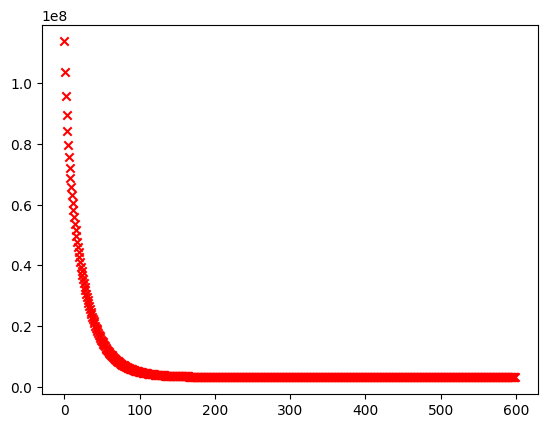

In [128]:
iters=np.arange(num_iters)
print(np.shape(iters))
j_hist=np.array(j_hist)
print(np.shape(j_hist))
plt.scatter(iters,j_hist,color='red',marker='x')

In [146]:
m,n=np.shape(x_test)
p,q=np.shape(x_train)
y_pred=np.zeros((m,))
y_train_pred=np.zeros((p,))

x_test_norm=(x_test-mu)/sd
for i in range(m):
    y_pred[i]+=(np.dot(x_test_norm[i],w_fin)+b_fin[0])
print(y_pred)
for i in range(p):
    y_train_pred[i]+=(np.dot(x_norm_train[i],w_fin)+b_fin[0])

[20399.61540612 14126.86395801 12601.88458957 17302.70776245
 13561.66331137  7573.40948356 17059.09247544  6597.25689065
 19294.9806216  12269.39124002 10901.50742808 30621.92230765
 10965.68396511  7013.90158718  8693.62421663  6593.45736613
 14763.93960517 33104.43479207 10546.51095492  5843.32521316
  8404.13620734 16846.60134037  6960.46107901  9411.55387543
  9163.67038009  5026.40967905 20401.72380159 10616.77975669
 19690.87956169 10928.52884199 34861.74862574  5738.22733242
 17406.96196796  8050.76518101  9622.44113088 32592.56854834
 21190.14174673 21491.58226982  7134.35065208 19976.76732323
 18986.34692374]


In [147]:
from sklearn.metrics import r2_score
score = r2_score(y_train, y_train_pred)
print("The training accuracy of our model is {}%".format(round(score, 2) *100))

The training accuracy of our model is 90.0%


In [148]:
score = r2_score(y_test, y_pred)
print("The testing accuracy of our model is {}%".format(round(score, 2) *100))

The training accuracy of our model is 86.0%
